# chapter03. 회귀 알고리즘과 모델 규제
###농어의 무게를 예측하라!

##**03-1. k-최근접 이웃 회귀**
 - 회귀 : 임의의 수치를 예측하는 문제. 따라서 타깃값도 임의의 수치가 됨. 두 변수 사이의 상관관계를 분석하는 방법 (by 프랜시스 골턴)
 - 분류 : 샘플을 몇 개의 클래스 중 하나로 분류

데이터 준비
 - 특성 : 농어의 길이
 - 타깃 : 농어의 무게

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

데이터의 산점도 출력

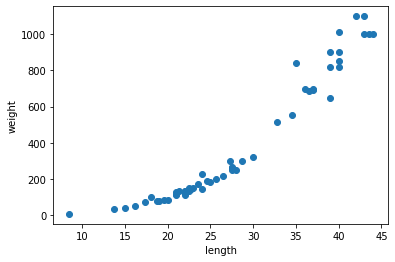

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련 세트와 테스트 세트로 나누기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

사이킷런에 사용하기 위해 훈련 세트를 2차원 배열로 변환

In [ ]:
# 배열 크기 변환 예시
test_array = np.array([1, 2, 3, 4])
print("shape :", test_array.shape)
test_array = test_array.reshape(2, 2)
print("reshape :", test_array.shape)

shape : (4,)
reshape : (2, 2)


In [ ]:
train_input = train_input.reshape(-1, 1) # 크기를 -1로 지정하면 나머지 원소 개수로 모두 채우라는 의미
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


###**결정계수(R²)**

 - coefficient of determination
 - 대표적인 회귀 문제의 성능 측정 도구
 - 1에 가까울수록 좋고, 0에 가깝다면 성능이 나쁜 모델
 - R²= 1 - ((타깃 - 예측)²의 합) / ((타깃 - 평균)²의 합)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))

0.992809406101064


타깃과 예측한 값 사이의 차이를 구해보기 (어느 정도 예측이 벗어났는지 가늠하기 위해서)

In [ ]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


예측이 평균적으로 19g 정도 타깃값과 다름

In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099254


### **과대적합 vs 과소적합**
 
 - 과대적합(overfiting) : 훈련 세트 점수는 높지만 테스트 세트 점수가 너무 나쁜 경우
 - 과소적합(underfiting) :  훈련 세트보다 테스트 세트 점수가 높거나 두 점수가 모두 낮은 경우


과소적합은 훈련세트와 테스트세트의 크기가 매우 작은 경우 발생하기도 함.

현재 훈련 세트보다 테스트 세트 점수가 높으므로 과소적합임.

따라서 모델을 더 복잡하게 만든다 → **이웃의 개수 줄이기**
 - 과대적합일 경우, 모델을 덜 복잡하게 → 이웃 수 늘리기
 - 과소적합일 경우, 모델을 더 복잡하게 → 이웃 수 줄이기

In [ ]:
# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)
print("훈련 세트 점수 :", knr.score(train_input, train_target))
print("테스트 세트 점수 :", knr.score(test_input, test_target))

훈련 세트 점수 : 0.9804899950518966
테스트 세트 점수 : 0.9746459963987609
